## **TASK - 03**

In [24]:
# Task 03: Decision Tree Classifier with Bank Marketing dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv("/content/bank.csv")

print(df.head())
print(df['deposit'].value_counts())   # check target distribution

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
deposit
no     5873
yes    5289
Name: count, dtype: int64


In [31]:
# Separate features & target
X = df.drop(columns=['deposit'])
y = df['deposit'].map({'yes':1, 'no':0})   # encode target

# One-hot encode categorical variables
cat_cols = X.select_dtypes(include=['object']).columns
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # updated for new sklearn
X_cat = ohe.fit_transform(X[cat_cols])
X_num = X.drop(columns=cat_cols).to_numpy()
X_final = np.hstack([X_num, X_cat])

# Combine column names for feature importance
encoded_cols = ohe.get_feature_names_out(cat_cols)
all_features = list(X.drop(columns=cat_cols).columns) + list(encoded_cols)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Decision tree model
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7948947604120018
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1166
           1       0.78      0.80      0.79      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.80      0.79      0.79      2233



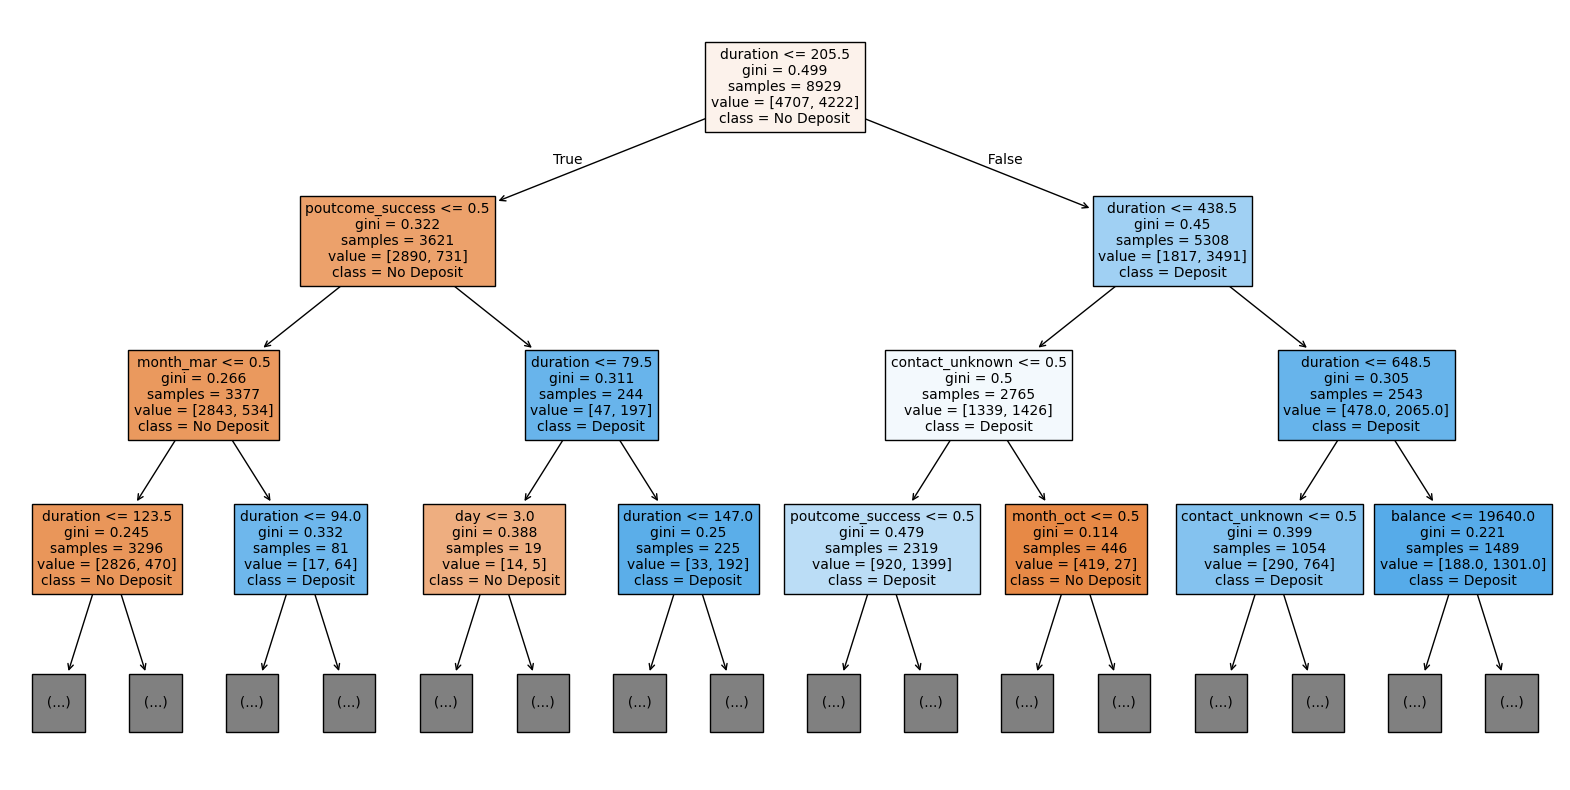

In [26]:
# Plot tree (first 3 levels)
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, max_depth=3, fontsize=10, feature_names=all_features, class_names=["No Deposit", "Deposit"])
plt.show()

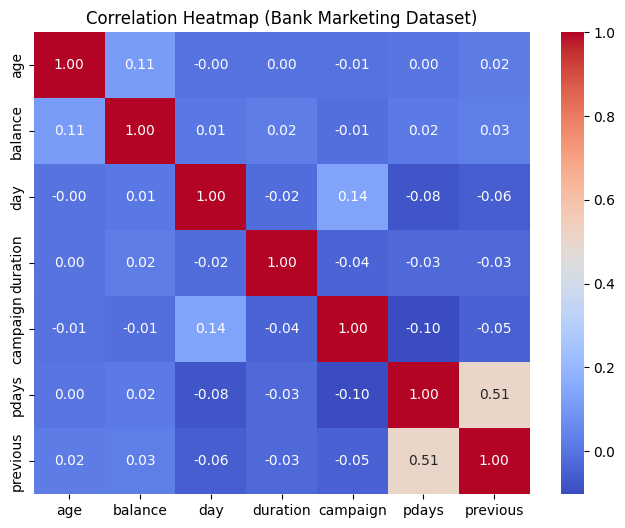

In [27]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Bank Marketing Dataset)")
plt.show()

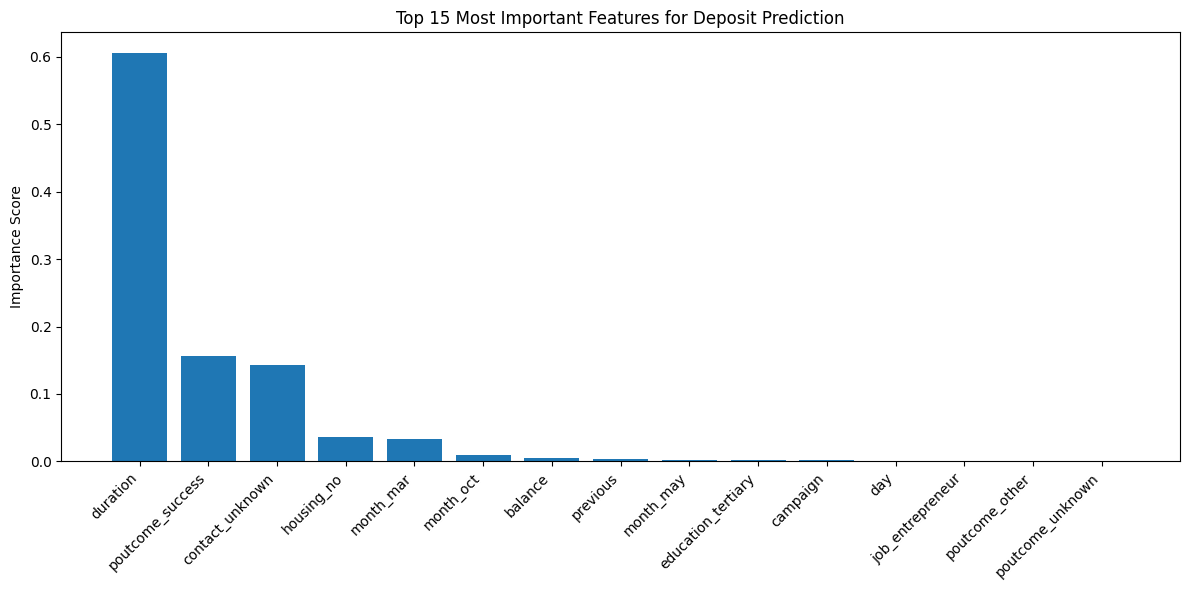

In [28]:
# Feature Importance Plot
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]  # sort by importance

plt.figure(figsize=(12,6))
plt.bar(range(15), importances[indices][:15], align="center")
plt.xticks(range(15), [all_features[i] for i in indices[:15]], rotation=45, ha="right")
plt.title("Top 15 Most Important Features for Deposit Prediction")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()